In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt

start = dt.datetime(2020,4,1)
end = dt.datetime(2020,9,2)
tickers = ['IBM', 'FB']



C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
spy = web.DataReader("SPY",'yahoo', start, end)
spy.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2020-08-27  349.899994  346.529999  348.510010  348.329987  58034100.0   
2020-08-28  350.720001  348.149994  349.440002  350.579987  48588900.0   
2020-08-31  351.299988  349.059998  350.350006  349.309998  66099200.0   
2020-09-01  352.709991  349.239990  350.209991  352.600006  54999300.0   
2020-09-02  358.750000  353.429993  354.670013  357.700012  69344600.0   

             Adj Close  
Date                    
2020-08-27  348.329987  
2020-08-28  350.579987  
2020-08-31  349.309998  
2020-09-01  352.600006  
2020-09-02  357.700012

In [4]:
govt = web.DataReader("govt",'yahoo', start, end)
govt.tail()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2020-08-27  28.000000  27.830000  27.990000  27.840000  7175000.0  27.814056
2020-08-28  27.900000  27.840000  27.870001  27.860001  3992900.0  27.834038
2020-08-31  27.950001  27.860001  27.879999  27.900000  8243500.0  27.873999
2020-09-01  27.959999  27.840000  27.870001  27.959999  4828100.0  27.959999
2020-09-02  28.030001  27.930000  27.940001  28.020000  3288900.0  28.020000

In [5]:
gld = web.DataReader("gld",'yahoo', start, end)
gld.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2020-08-27  185.169998  179.369995  185.000000  181.240005  16299200   
2020-08-28  185.399994  183.399994  183.979996  184.389999  13200800   
2020-08-31  185.529999  184.279999  184.789993  184.830002  10251200   
2020-09-01  186.990005  184.330002  186.990005  185.050003  10689100   
2020-09-02  183.860001  181.500000  183.750000  182.619995  11496000   

             Adj Close  
Date                    
2020-08-27  181.240005  
2020-08-28  184.389999  
2020-08-31  184.830002  
2020-09-01  185.050003  
2020-09-02  182.619995

In [6]:
spy_close = spy[["Close"]]

In [7]:
govt_close = govt[["Close"]]

In [8]:
gld_close = gld[["Close"]]

In [9]:
import sklearn.linear_model
df = govt_close.merge(gld_close, how="inner", on="Date")
df = spy_close.merge(df, how="inner", on="Date")
df.columns = ["SPY_Close", "GOVT_Close", "GLD_Close"]

X = df[["GOVT_Close", "GLD_Close"]]
y = df[["SPY_Close"]]
X

GOVT_Close   GLD_Close
Date                              
2020-04-01   28.100000  149.449997
2020-04-02   28.100000  151.899994
2020-04-03   28.139999  152.649994
2020-04-06   28.070000  156.880005
2020-04-07   27.980000  156.039993
...                ...         ...
2020-08-27   27.840000  181.240005
2020-08-28   27.860001  184.389999
2020-08-31   27.900000  184.830002
2020-09-01   27.959999  185.050003
2020-09-02   28.020000  182.619995

[108 rows x 2 columns]

In [10]:
model = sklearn.linear_model.LinearRegression()

In [11]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
predictions = model.predict(X)

In [13]:
model.score(X,y)

0.8785057793843396

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statistics 

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, predictions))


Coefficients: 
 [[-72.30782096   2.23998866]]
Mean squared error: 69.52
Coefficient of determination: 0.88


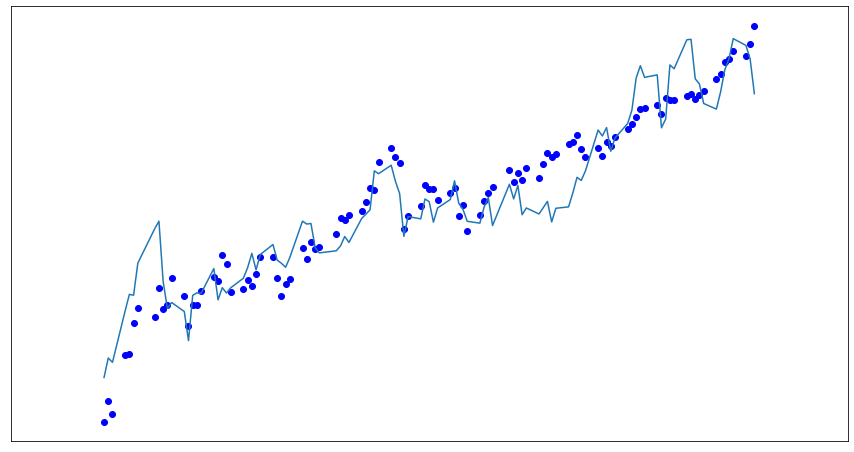

In [15]:
# # Plot outputs
import matplotlib.pyplot as plt
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, predictions, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
b2 = model.coef_[0][1]
plt.figure(figsize=(15,8))
# Plot outputs
plt.scatter(df.index, df["SPY_Close"],  color='blue')
plt.plot(df.index, (b0 + b1*df["GOVT_Close"] +  b2*df["GLD_Close"]))
#plt.plot(y_test.index, X_test[""], 'o', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

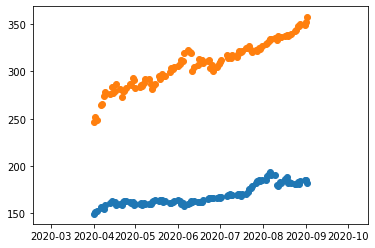

In [181]:
plt.scatter(df.index, df["GLD_Close"])
plt.scatter(df.index, df["SPY_Close"])

In [183]:
import sklearn.linear_model
df = gld_close
df = spy_close.merge(df, how="inner", on="Date")
df.columns = ["SPY_Close", "GLD_Close"]

X = df[["GLD_Close"]]
y = df[["SPY_Close"]]

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))

Coefficients: 
 [[1.92190565]]
Mean squared error: 42.86
Coefficient of determination: 0.90


1.9219056536480765


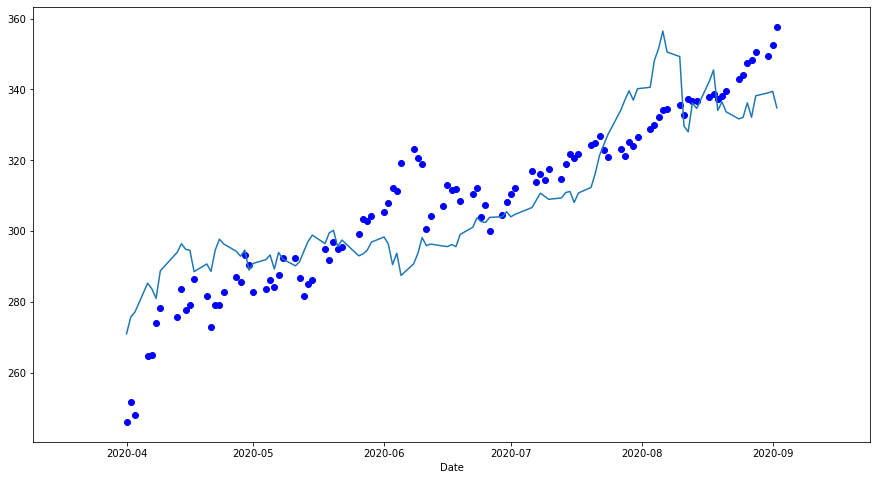

In [185]:
import matplotlib.pyplot as plt
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, predictions, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
plt.figure(figsize=(15,8))
# Plot outputs
plt.scatter(df.index, df["SPY_Close"],  color='blue')
plt.plot(df.index, (b0 + b1*df["GLD_Close"]))
#plt.plot(y_test.index, X_test[""], 'o', linewidth=1)
print(b1)
plt.xlabel("Date")
plt.show()